### End to End - Machine Learning 

##### Framing the problem 

The given dataset is a list of population, median income, median housing
price in the state of california 

Business Goal: Depending on the median housee price and other signals, is it worth investing in a given area.

Currend Model: Understand the current solution and try to get the performance on the current model. 

Data Pipeline: Sequence of data processing components is called a data pipeline

    side note: univariate regression problem is when a single response is predicted for a many predictors*
    similarly multivariate regrssion problem is when multiple response variables are predicted for many predictors*


##### Selecting a performance measure 

In this case of linear regression - Root mean squared

$$ RMSE(X,h) = \sqrt{\frac{1}{n} \sum_{i=1}^\infty (y_{i}-\hat{h}(x_{i}))^2} $$

$$ x \text{ is the vector of the feature values} $$
$$ y \text{ is the desired output value of that instance} $$
$$ n \text{ is the total number of observations} $$
$$ X \text{ is a matrix contains all the feature values in each column } x^{T} $$
$$ h \text{ is a prediction function which gives } \hat{y} $$
$$ RMSE(X,h) \text{ is the cost function measured on the set of examples using your hypothesis h } $$

RMSE is generally preferred but in some contexts we may need to use a different measure 
eg: Mean Absolute Error 

$$ MAE(X,h) = \frac{1}{n} \sum_{i=1}^{m} |{y_{i}- h(x_{i})}| $$

    Computing the squared root corresponds to Euclidean norm. also called L-2 norm
    Computing the sum of absolutes corresponds to L1 norm
    
Higher the norm index the more focus is given to the large values and smaller ones are ignored.

##### Check the Assumptions

In the case of the real estate pricing example the downstream might convert the prices and class them as Cheap, medium and expensive. Hence in this case we need to get the category right rather than the price itself. Instead of regression this becomes a classification problem. 



#### Getting the Data 

In [1]:
# import statements and setting the download folder
import os
import tarfile
import urllib

URL_LINK = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.chdir("E:\\Datasets") # changing dir
PATH = os.path.join("housing") #name of the folder
DOWNLOAD_FILE = URL_LINK + "datasets/housing/housing.tgz"

In [2]:
# creating a generic fucntion to download the file 

def get_housing_data(download_file=DOWNLOAD_FILE, path=PATH):
    '''Pass the file to download and path where to store the file'''
    if not os.path.isdir(path):
        os.makedirs(path)
    if "tgz" in download_file: # Checking if we need to extract the file
        tgz_path = os.path.join(path,"housing.tgz")
        urllib.request.urlretrieve(download_file,tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=path)
        housing_tgz.close()
    else: 
        print("check the file in the system")

In [3]:
get_housing_data(DOWNLOAD_FILE,PATH) # download the dataset

In [4]:
#importing pandas 
import pandas as pd
def load_dataset(path=PATH):
    if os.path.isfile(os.path.join(path,'housing.csv')):
        csv_path = os.path.join(path,'housing.csv')
        return pd.read_csv(csv_path)
    else:
        return "file not found"


In [5]:
data = load_dataset(PATH) #loading the data to pandas

In [6]:
data.head() #getting first 5 rows of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info() #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data['ocean_proximity'].value_counts() #getting count of unique values of ocean_proximity 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
data.describe() # getting stats about the data set 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Visualizing the data via histrogram 

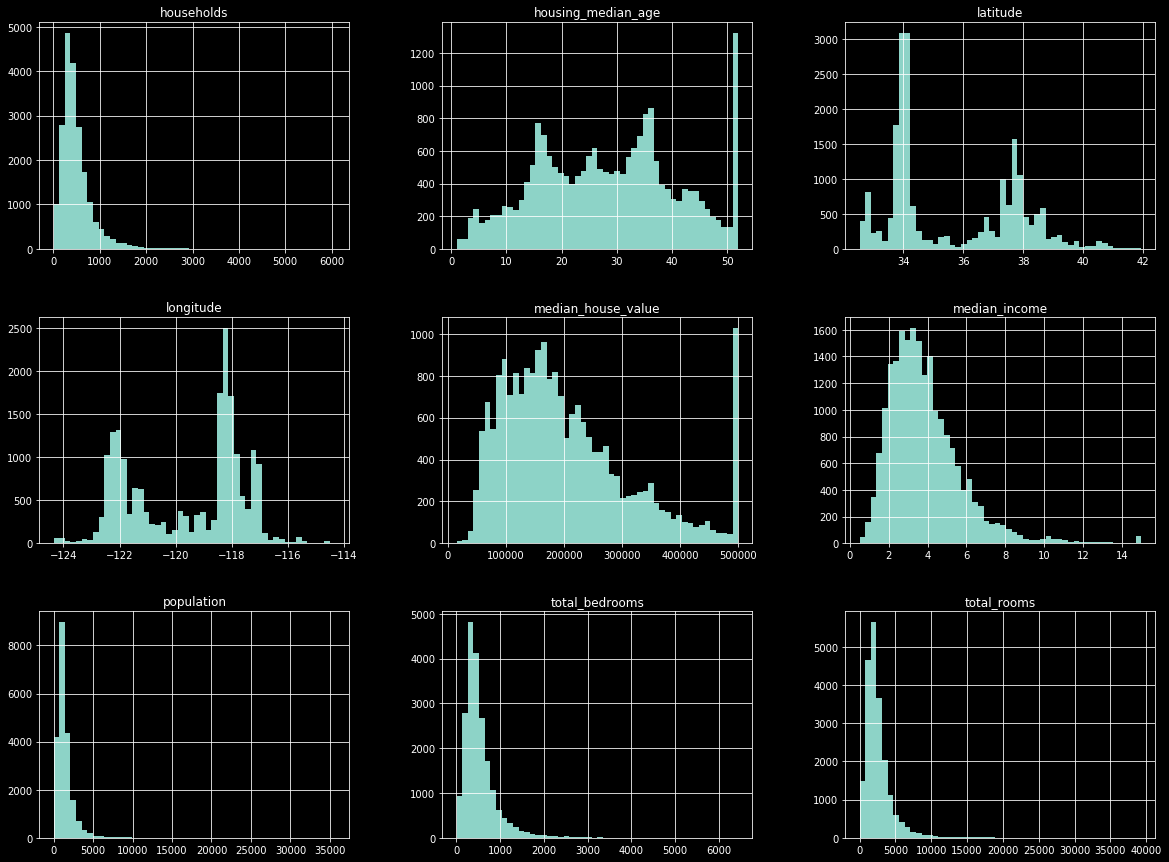

In [10]:
%matplotlib inline 
#magic function to plot and store the figure in the notebook 
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
data.hist(bins = 50,figsize=(20,15))
plt.show()


#### Observations

    1. The median_income is not expressed in dollars and the data is capped
    2. Similarly the median_age and also the median_house_value is capped at 
        a.since Median_house_value is our target variable we need to find out why this is capped? 
If we need to model including the median_house_value beyond 500k.
    
    collect the proper labels for which the values were capped
    remove the district from training set and test set for which the house values beyond 500,000 were capped

--

    3.These attributes are of different scale, we need to perform feature scaling to bring them in the same scale
    4.Since the histograms are tail heavy we need to bring them to a normal distribution in order for the model to detect the patterns. 

###### Data Snooping Bias 

When we split the training set to test set, we shouldn't look at the test set data as we might detect certain pattern and might be biased to that. 

###### Sampling Bias

When the sample size is not too large, we should be aware of the sampling bias. The sample chosen should representive of the population. 

###### Stratified sampling

The training data is divided into subgroups and right numbers are sampled across the 2 groups. 
the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population.

In [11]:
# scikit learn has a train_test_split function which split the training set and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,test_size=0.2,random_state = 42)

##### Pandas cut function 
Used in order to convert continuous variable into groups or ranges 
Bin values into discrete intervals
##### Numpy infy function
Numpy.inf gives the positive infinity.



In [12]:
import numpy as np
# converting the continuous variable to a categorical variable
# We use this information to get the stratified sampling. 
data['income_cat'] = pd.cut(data['median_income'],
                     bins = [0.,1.5,3.0,4.5,6.,np.inf],
                     labels = [1,2,3,4,5])

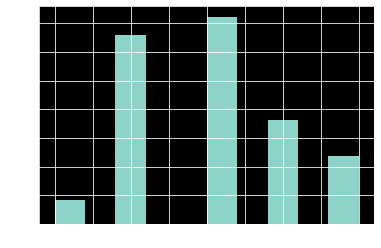

In [13]:
data['income_cat'].hist()
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
strasplit = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in strasplit.split(data,data['income_cat']):
    strain_set = data.iloc[train_index]
    stest_set = data.iloc[test_index]

In [15]:
strain_set['income_cat'].value_counts() / len(strain_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [16]:
data.drop(labels='income_cat',axis=1,inplace=True) #drop the column income_cat 
# inplace=False by default will return None and not perform the operation. 
# the console will display the dataframe without the column. In order to apply the drop inplace = True

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Exploratory Data Analysis

In [18]:
# Analysing the location data with longititude and Latitude 
data = strain_set.copy() #taking the copy of the training data 

In [19]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


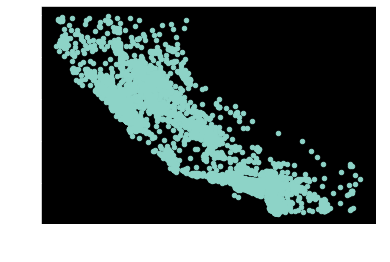

In [20]:
data.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

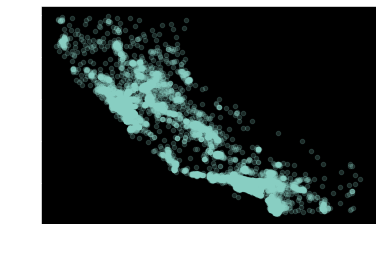

In [21]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)
plt.show()

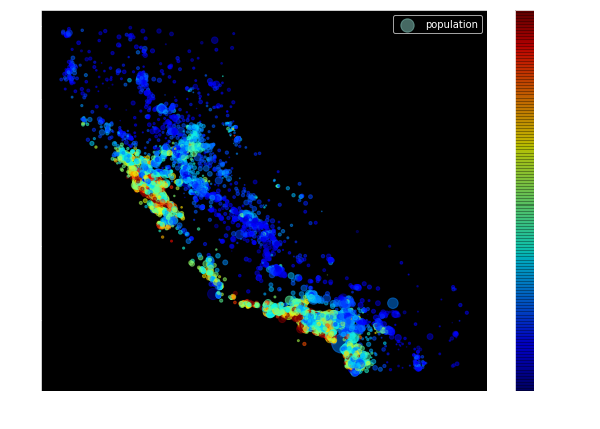

In [22]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,
         s=data['population']/100,label='population',figsize=(10,7),
         c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()

#### Looking for Correlations in the data 

In [23]:
corr_matrix = data.corr() 

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

    there is a positive correlation between median house value and median income. 
    there is a slight negative correlation between latitude and the house pricing. 

note: correlation only gives a linear relationship about the data. Non linear relationship is not represented in correlation.

Another way is to compute the scatter_matrix from pandas function to check for correlations 

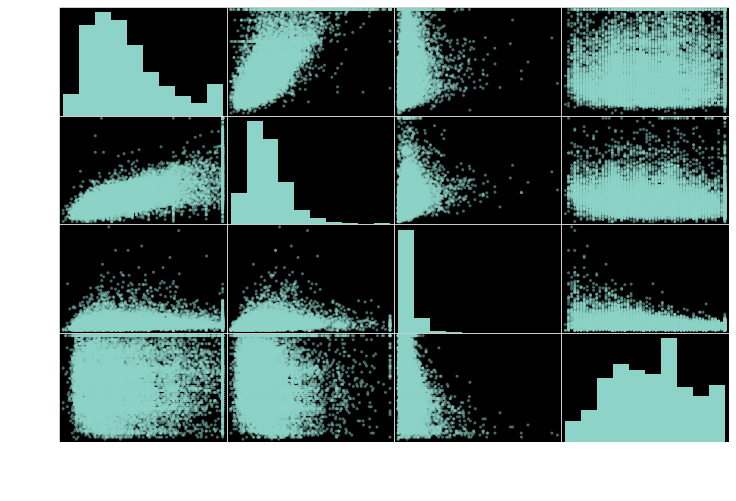

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(data[attributes],figsize=(12,8))
plt.show()


Looking at the correlation between median income and medain housing value 

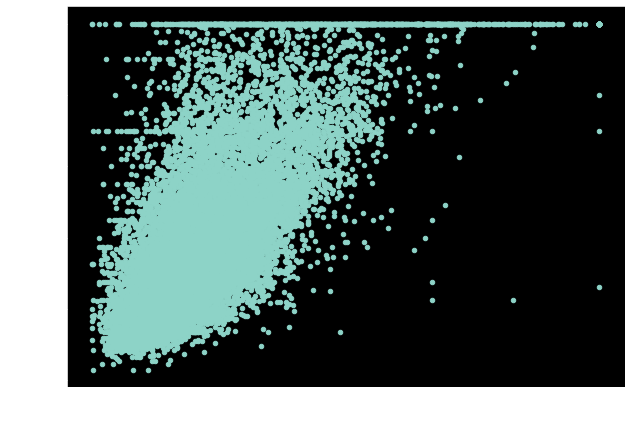

In [26]:
data.plot(kind='scatter',y='median_house_value',x='median_income',figsize=(10,7))
plt.show()
# median income versus median house value 

In [27]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [28]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedroom_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [29]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedroom_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3,4.505810,0.231341,3.047847


In [30]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_room           -0.259984
Name: median_house_value, dtype: float64

In [31]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedroom_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


Houses with lower bedroom / room has a negative correlation with the housing median price. 
lesser bedroom per room is expensive 

In [32]:
# drop here creates a copy of the strain_set without median house value and the income category
data = strain_set.drop(["median_house_value","income_cat"],axis=1)

In [33]:
housing_value_label = strain_set['median_house_value'].copy()

In [34]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### Data Cleaning 
The total bed rooms have missing values and needs to be fixed by

    1.Remove the corresponding districts
    2.Get rid of the whole attribute
    3.Set value (zero, mean, median etc..) 
    


Below methods like dropna, drop and fillna are used to 

    1.dropna (drops all the rows having missing values)
    2.drop (completely removes the colum value or row value) depending on the axis
    3.fillna (fills the data with strategy value used in the below case (median)

In [35]:
# data.dropna(subset=['total_bedrooms']) #removes all the rows having missing values
# data.drop('total_bedrooms',axis=1) # removes the entire column total_rooms
# data['total_bedrooms'].fillna(data['total_bedrooms'].median(),inplace=True)

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# dropping the ocean proximity as its not a numerical value 
data_num = data.drop('ocean_proximity',axis=1)

imputer.fit(data_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
imputer.statistics_ #median for each attribute is stored in the array list

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Its better to apply the imputer on all the numerical attributes, since we would not know if there will be any missing values in the future with the new dataset.

In [38]:
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [39]:
data_num.loc[data_num['total_bedrooms'].isna()==True,:] # number of rows in total_bedrooms having null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330
4496,-118.22,34.05,34.0,1113.0,NaN,928.0,290.0,3.1654
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750
2412,-119.45,36.61,24.0,1302.0,NaN,693.0,243.0,3.7917


In [40]:
data_num.median().values # pandas series 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Transforming the columns of the training set having null values to the median values. 

In [41]:
X = imputer.transform(data_num)

The imputer transform is a ndarray and not a data frame. The below code is used to convert the array X into dataframe.

In [42]:
data_numtf = pd.DataFrame(X,columns=data_num.columns)

In [43]:
data_numtf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


##### SciKit learn design 

**Estimator** 
>Any object that can estimate some parameters based on a dataset is called estimator.
imputer is an estimator and it is performed by fit() method
Any other parameter which needs to guide the estimator is given as a hyperparameter. In this case its Imputer strategy

**Transformers** 
>Some estimators can also transform a dataset 
Transformers is performed by the transform() method. Transform method usually relies on the learned parameters,as in this case of an imputer. 
fit_transform() is the same as fitting first and then transforming it. 
sometimes fit_transform is optimized to run faster. 

**Predictors** 
>Some estimators are capable of making predictions given a dataset 
eg: LinearRegression model is a predictor which uses predict() method to perform. 
Also it has a score() method to measure the quality of the predictions on the test set

**Inspection** 
>All the estimator's hyperparatmers are accessible via a public instance variables 
eg; imputer.strategy 
all the estimator's learned parameters are also accessible via a public instance variable with an underscore eg: imputer.statistics_ 

**Non proliferation of classes** 
>Datasets are represented as NumPy arrays or SciPy
sparse matrices, instead of homemade classes. Hyperparameters are just regular
Python strings or numbers.

**Composition** 
>Existing building blocks are reused as much as possible. For
example, it is easy to create a Pipeline estimator from an arbitrary sequence of
transformers followed by a final estimator.

**Sensible defaults** 
>SciKit learns provides reasonable defaults for most parameters. 

#### Handling text and catagorical attributes 

In our dataset we have only ocean proximity as the categorical variable 

In [44]:
data_cat = data[['ocean_proximity']] 
#double brackets for storing the categorical value as dataframe
data_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Encoding the categorical value to numerical value using OrdinalEncoder from sklearn

In [45]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [46]:
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

The list of categories can be obtained from the public instance variable of categories_

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The problem with the oridinal encoder labelling is that ML algorithms will assume that 2 nearby values are more similar that 2 distant values.
To solve this, we need to use OneHotEncoder module 

Encoding the categorical value to numerical value using OneHotEncoder from sklearn which returns a SciPy sparse matrix with 0's and 1's 


In [48]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [49]:
data_onehot_encode = one_hot_encoder.fit_transform(data_cat)

In [50]:
data_onehot_encode

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
data_onehot_encode.toarray() #converting to toarray in order to view the information 

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
one_hot_encoder.categories_
'''The list of categories can be obtained _from the public instance variable of categories_'''

'The list of categories can be obtained _from the public instance variable of categories_'

When there are large number of the categorical variables one hot encoder will result in large number of input variables. this will slow down training and degrade performance. 
In such cases we may want to replace categorical variable with numerical variable. (instead of label values of ocean proximity, use distance from the ocean in meters etc.) 

Another alternate way is to replace the categorical with learnable low dimensional vector called <font color='green'>**embedding**</font>. Each category's representation will be learnt during training.  This is called <font color='green'>**representational learning**</font>

#### Custom Transformers

[**<font color='yellow'>Duck Typing</font>**](https://en.wikipedia.org/wiki/Duck_typing) When an object's suitability is determined by the presence of a certain method rather than the object's type itself. 

We don't need to instantiate the class, rather the method association with the object defines 

```python
class Duck:
    def fly(self):
        print("Duck flying")

class Airplane:
    def fly(self):
        print("Airplane flying")

class Whale:
    def swim(self):
        print("Whale swimming")

for animal in Duck(), Airplane(), Whale():
    animal.fly()
```

Output:
>Duck flying<br>
Airplane flying<br>
AttributeError: 'Whale' object has no attribute 'fly'




In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X,y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_addribs = attr_adder.transform(data.values)

combined attributes adder class inherits from BaseEstimator which contains get_params() and set_params() which is useful for automatic hyperparameter tuning. 

#### Feature scaling 

Machine learning algorithms won't perform well when input numerical data attributes are at different scale. 

>scaling the target variable is generally not required

Two common ways of getting the all the attributes to scale: 
    
    1.min-max scaling 
    2.standardization 
    
Min-Max scaling is scaling technique where values are shifted and rescaled so that they end up from 0 to 1. sklearn has a inbuilt transformer called <font color='green'>MinMaxScalar</font>

Standardization subtracts the mean value and then divides by standard deviation so that the resulting distribution has unit variance. 

This is not affected by outliers. 
Standardization does not bound values to specific range. (may be a problem for neural networks as it expects an input value from 0 to 1.

<font color='green'>StandardScalar</font> is used to perform the standardization in sklearn. 


>Its always import to fit the scalers to only the training data and not to the full dataset(including test data). why is this? 

#### Transformation Pipelines

SciKit-learn providess ***Pipeline*** class to perform the sequence of steps required for the transformation of the data. 

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attribs',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler())
                        ])
data_num_tf = num_pipeline.fit_transform(data_num)

The last estimator in the Pipeline constructor should be a transformer. The class should contains the fit_transform() method.

When the Pipeline's fit() method is called, the fit_transform() methods are called sequentially on all transformers passing the output of each call as parameter to the next call, untill it reaches the final estimator, for which it just calls the fit() method. 

Importing the columntransformer from the sklearn compose package

In [55]:
from sklearn.compose import ColumnTransformer

num_attrib = list(data_num)

In [56]:
num_attrib

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [57]:
cat_attrib = ['ocean_proximity']

full_pipe = ColumnTransformer([('num',num_pipeline,num_attrib),
                               ('cat',OneHotEncoder(),cat_attrib)])

ColumnTransformer requires a list of tuples, where each tuple contains a name (can be anything as long it does not contain with double underscore


In [58]:
data_prep = full_pipe.fit_transform(data)

In [59]:
data_prep[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

OneHotEncode retruns a sparse matrix while the num_pipeline returns a dense matrix. 
ColumnTransformer estimates the density of the final matrix. 
ratio of non-zero cells and returns a sparse matrix if the density is lower than given threshold  (sparse_threshold = 0.3)

#### Select and Train a Model

In [60]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data_prep,housing_value_label) #data_prep is the predictor, housing_label_value is the Response 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
some_data = data.iloc[:5]
some_labels = housing_value_label.iloc[:5]
some_data_prep = full_pipe.transform(some_data)
print("Predictions: ",regressor.predict(some_data_prep))
print("labels",list(some_labels))


Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Calculating the mean squared error

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
data_prediction = regressor.predict(data_prep)
lin_mse = mean_squared_error(housing_value_label,data_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

The root mean squared error value is higher and this is an example of underfitting the data. 

> Selecting a powerful model with more features <br>
Feeding better features to the learning algorithm

Model using Decision Trees

In [64]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prep,housing_value_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Model is trained on the decision tree

In [65]:
data_prediction = tree_reg.predict(data_prep)
tree_mse = mean_squared_error(housing_value_label,data_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

I'ts more likely the model has overfitted the data. how can we be sure? 

#### Better evaluation using cross-validation

One way is to use train_test_Split in order to evaluate the decision tree model
Training the models against a smaller training set and evaluate them against the validation set. 

>Using SciKit learn K fold cross validation feature, smaller training sets are divided into 10 folds and evaluated aganist 1 fold while being trained on the remaining 9 folds. Each folds are randomly picked.

In [66]:
from sklearn.model_selection import cross_val_score

[Model Evaluation scoring methods](https://scikit-learn.org/stable/modules/model_evaluation.html) - Reference SciKit Learn

In [67]:
scores = cross_val_score(tree_reg,data_prep,housing_value_label,
                         scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

Reason for the -ve sign:

>SciKit learn cross validation feature expects a utility function rather than a cost function(lower is better). Scoring function is opposite of the MSE. hence the negative value

In [68]:
def display_scores(scores):
    print("scores: ",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [69]:
display_scores(tree_rmse_scores)

scores:  [70055.6039563  69190.13093509 70679.9819983  68870.82463427
 71392.80630375 74449.24144808 71807.18028639 71418.06757521
 76388.13928657 68990.27721449]
Mean: 71324.22536384416
Standard Deviation 2317.3476828245125


Cross Validation score for linear regression

In [70]:
lin_scores = cross_val_score(regressor,data_prep,housing_value_label,
                             scoring='neg_mean_squared_error',cv=10)

In [71]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [72]:
display_scores(lin_rmse_scores)

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation 2731.674001798346


We would expect a low mean sqauared error rate, here the decision tree is performing worse than the linear regression 

Model is trained on the decision tree

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
ranfor_reg = RandomForestRegressor(n_jobs=-1)
ranfor_reg.fit(data_prep,housing_value_label)

C:\Users\bhara\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [75]:
forest_predictor = ranfor_reg.predict(data_prep)
forest_mse = mean_squared_error(housing_value_label,forest_predictor)
forest_mse
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22145.197674043684

In [76]:
forest_scores = cross_val_score(ranfor_reg,data_prep,housing_value_label,
                                scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores:  [51238.98810083 49301.95918039 53411.37227583 55326.2434461
 51935.93179484 56255.22099153 51674.61436101 50815.08198284
 55237.2646709  53506.57232507]
Mean: 52870.32491293433
Standard Deviation 2137.9975598942615


From the above results the training set scores till is less than that of the validation set.
The model is still overfitting the training set. 

Solution is to regularize it(constrain it) or get more training data. 


The Hyperparameter, trained parameter , cross-validation scores and even the actual prediction should be saved in order to compare with multiple models. 


Python's Pickle module is used to serialize objects structure 
SciKit learn's joblib is more efficient in serializeing NumPy arrays 

In [77]:
from sklearn.externals import joblib

C:\Users\bhara\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [78]:
joblib.dump(forest_rmse,"model.pkl")

['model.pkl']

#### Fine-Tune your model 

##### Grid Search 
In order to fine tune the model we would have to change the hyperparameter manually, which could take time and tedious to perform manually. 

SciKit learn's GridSearchCV can perform the same automatically, we need to give the hyperparamter to experiment with and the values to try out and this will evaluate all the possible combinations of the hyperparameter values using cross validation. 

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]


In [81]:
grid_search = GridSearchCV(ranfor_reg,param_grid,cv=5,n_jobs=-1,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(data_prep,housing_value_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
        

In [82]:
grid_search.best_params_ # getting the best parameters

{'max_features': 6, 'n_estimators': 30}

In [83]:
grid_search.best_estimator_ #getting the best estimator

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [84]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([0.70791097, 0.46829424, 0.69590411, 0.81185122, 0.73432851,
        1.51233311, 0.66782765, 0.90208783, 1.70469584, 0.9070375 ,
        0.84783568, 2.18994122, 0.92869115, 0.58041506, 0.59859395,
        0.51250238, 0.76263309, 0.65911994]),
 'std_fit_time': array([0.53131471, 0.06273699, 0.11974501, 0.0405306 , 0.13916168,
        0.08656304, 0.16137672, 0.18125188, 0.09935571, 0.36226941,
        0.25646756, 0.31710866, 0.76498085, 0.05697907, 0.07413243,
        0.11840048, 0.09589417, 0.18532635]),
 'mean_score_time': array([0.3978704 , 0.34247537, 0.25862198, 0.13709121, 0.64727969,
        0.19883385, 0.56516147, 0.68618612, 0.6538095 , 0.24270511,
        0.6616116 , 0.66327062, 0.23832464, 0.27331901, 0.13442421,
        0.31222134, 0.214259  , 0.1812016 ]),
 'std_score_time': array([0.30210726, 0.06679227, 0.17027986, 0.01229463, 0.45387902,
        0.02779156, 0.14607666, 0.11949847, 0.43625606, 0.10265062,
        0.37288911, 0.54304431, 0.15301504, 

In [85]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64203.691491080994 {'max_features': 2, 'n_estimators': 3}
55079.82746636624 {'max_features': 2, 'n_estimators': 10}
52891.0913188661 {'max_features': 2, 'n_estimators': 30}
60026.1214251431 {'max_features': 4, 'n_estimators': 3}
53100.01243804187 {'max_features': 4, 'n_estimators': 10}
50640.31992937155 {'max_features': 4, 'n_estimators': 30}
58831.8045374606 {'max_features': 6, 'n_estimators': 3}
52282.04346639704 {'max_features': 6, 'n_estimators': 10}
49949.13323643673 {'max_features': 6, 'n_estimators': 30}
58955.26082395333 {'max_features': 8, 'n_estimators': 3}
52226.45732988625 {'max_features': 8, 'n_estimators': 10}
50044.10669041852 {'max_features': 8, 'n_estimators': 30}
62485.14744317046 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54545.610946023095 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59368.22643827892 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52296.42860788885 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

##### Randomized Search 
Instead of trying out the given possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

Benefits of Randomized Search over Grid Search 

>Allowing the random search for eg: 1000 iterations will explore 1000 values for each hyperparameter instead of few.

>More control over computing budget that one have to allocate for parameter search

In [86]:
from scipy.stats import randint
param_grid = {'n_estimators':randint(1,100),
              'max_features':randint(1,8)}

In [87]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(ranfor_reg,param_distributions=param_grid,n_iter=10,n_jobs=-1,
                                scoring='neg_mean_squared_error',
                                return_train_score=True)

In [88]:
rand_search.fit(data_prep,housing_value_label)

C:\Users\bhara\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=-1,
                                                   oob_score=False,
                                                   random_stat...


In [89]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [90]:
rand_search.best_params_

{'max_features': 6, 'n_estimators': 82}

In [91]:
rand_search.best_estimator_.feature_importances_

array([7.77171157e-02, 7.15300914e-02, 4.23089929e-02, 1.67969666e-02,
       1.64708844e-02, 1.71745634e-02, 1.58918891e-02, 3.29481237e-01,
       6.50103363e-02, 1.10487292e-01, 7.07194194e-02, 1.07459030e-02,
       1.48582776e-01, 9.76849875e-05, 3.05352434e-03, 3.93132385e-03])

In [92]:
rand_cvres = rand_search.cv_results_
rand_cvres

{'mean_fit_time': array([0.89259632, 3.35125359, 2.93274379, 1.1101946 , 2.72837377,
        1.02903644, 3.832745  , 3.79767609, 2.08214339, 0.62281593]),
 'std_fit_time': array([0.21835086, 0.82276457, 0.61837946, 0.05384622, 0.02497515,
        0.12932913, 0.12293572, 0.03793699, 1.022402  , 0.00914359]),
 'mean_score_time': array([1.64390405, 1.42478585, 0.89092541, 1.61188777, 2.74061362,
        0.00432507, 0.65915656, 0.38731162, 0.3279686 , 0.11238011]),
 'std_score_time': array([0.22145849, 0.41782786, 0.30557813, 0.21648775, 0.05091493,
        0.00044125, 0.16769431, 0.11550069, 0.05720583, 0.00191533]),
 'param_max_features': masked_array(data=[6, 6, 1, 3, 4, 7, 4, 4, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[8, 82, 73, 26, 81, 1, 52, 63, 20, 25],
              mask=[False, False, False, False, False, False,

In [93]:
for mean_score,params in zip(rand_cvres['mean_train_score'],rand_cvres['params']):
    print(np.sqrt(-mean_score),params)

23468.982474180164 {'max_features': 6, 'n_estimators': 8}
18887.62335059716 {'max_features': 6, 'n_estimators': 82}
21173.710641306057 {'max_features': 1, 'n_estimators': 73}
20588.284665381394 {'max_features': 3, 'n_estimators': 26}
19055.403230398068 {'max_features': 4, 'n_estimators': 81}
45341.22456582868 {'max_features': 7, 'n_estimators': 1}
19326.63243286208 {'max_features': 4, 'n_estimators': 52}
19125.22790162574 {'max_features': 4, 'n_estimators': 63}
22756.646078675745 {'max_features': 1, 'n_estimators': 20}
22279.88800092227 {'max_features': 1, 'n_estimators': 25}


##### Ensemble Methods
One way to choose the best model is to combine the multiple models that perform the best. 
This would perform better than best individual model. 

In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [95]:
feature_importances.round(2)

array([0.08, 0.07, 0.04, 0.02, 0.02, 0.02, 0.02, 0.32, 0.06, 0.11, 0.07,
       0.01, 0.16, 0.  , 0.  , 0.01])

In [96]:
len(data.columns)

9

In [97]:
extra_attribs = ["rooms_per_household","population_per_household","bedrooms_per_room"]
cat_encoder = full_pipe.named_transformers_["cat"] # get the categorical values from pipeline 
cat_one_hot_encoder = list(cat_encoder.categories_[0]) # convert them to list 
attributes = num_attrib + extra_attribs + cat_one_hot_encoder  # stitching the lists and arrays
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3221647367858245, 'median_income'),
 (0.15709087871361224, 'INLAND'),
 (0.10821622765996927, 'population_per_household'),
 (0.07751300354203751, 'longitude'),
 (0.07049795006326232, 'latitude'),
 (0.06994743548304332, 'bedrooms_per_room'),
 (0.06335173880669971, 'rooms_per_household'),
 (0.04331460562747157, 'housing_median_age'),
 (0.017645657968245763, 'total_rooms'),
 (0.016692673727132977, 'total_bedrooms'),
 (0.016660202642069112, 'households'),
 (0.016616287695412044, 'population'),
 (0.012532737912547713, '<1H OCEAN'),
 (0.006032746040737043, 'NEAR OCEAN'),
 (0.0016566225564951997, 'NEAR BAY'),
 (6.649477543956369e-05, 'ISLAND')]

Based on the above we may want to drop features which are of less importanance. 
Ocean_Proximity category is useful. 

##### Evaluate system on the test set

<font color='red'> Ensure when you run the pipleline on the test, use transform() and not fit_transform() we don't to fit the test set</font>



In [98]:
final_model = rand_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

Removing the median housing value from the stratified test set and copying the median housing value to the y test variable 

In [99]:
x_test = stest_set.drop("median_house_value",axis=1)
y_test = stest_set.median_house_value.copy()

In [100]:
x_test_prepared = full_pipe.transform(x_test) # running the x_test into the pipeline for data prep

In [101]:
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47087.12913147569

We would need to have an idea of how precise this estimate is. We would need to compute a 95% confidence interval for the generalization error using scipy status package

In [102]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2

In [103]:
np.sqrt(stats.t.interval(confidence,len(squared_errors) -1,loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors)))

array([45117.69586122, 48977.43337358])

The final model is not better than the experts who were predicting the prices before. It would be a good idea to still launch it and free up sometime from the experts. 

Things to be considered when the model is in production:

    ..Need to write monitoring code to check the model's performance at regular intervals. This is required as over the period of time the model performance would rot as data evolves over time.
    ..Evaluating the system's performance will require sampling the system's predictions and evaluating them. 
    ..Evaluating input data quality. This is required as the input data feed might be worse 
    